In [52]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets.samples_generator import make_blobs
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

In [37]:
#generate toy dataset
X, y = make_blobs(n_samples=1000, centers=4, n_features=2, cluster_std=2, random_state=2)

In [39]:
y

array([2, 2, 2, 1, 1, 0, 1, 2, 3, 2, 1, 0, 1, 0, 0, 2, 2, 3, 2, 1, 3, 0,
       0, 3, 1, 3, 3, 3, 0, 2, 0, 0, 2, 3, 1, 0, 1, 2, 2, 1, 3, 3, 1, 2,
       3, 0, 0, 1, 1, 0, 0, 3, 0, 3, 2, 3, 3, 0, 2, 1, 3, 1, 3, 0, 1, 3,
       0, 1, 3, 0, 2, 1, 3, 3, 2, 2, 1, 1, 3, 2, 3, 1, 2, 2, 0, 2, 3, 3,
       1, 2, 3, 0, 2, 0, 1, 2, 2, 0, 3, 0, 3, 3, 3, 1, 1, 2, 2, 1, 0, 3,
       0, 3, 1, 3, 0, 0, 0, 0, 2, 2, 0, 3, 0, 2, 1, 2, 3, 0, 1, 0, 2, 0,
       0, 0, 1, 0, 3, 2, 1, 1, 3, 1, 0, 2, 3, 3, 1, 1, 1, 3, 1, 1, 3, 0,
       1, 1, 1, 3, 2, 2, 0, 2, 1, 2, 0, 2, 0, 1, 1, 2, 1, 3, 3, 0, 3, 2,
       1, 2, 2, 3, 3, 0, 2, 2, 2, 1, 2, 1, 0, 0, 1, 3, 2, 2, 1, 0, 3, 2,
       3, 3, 3, 3, 3, 2, 3, 1, 2, 3, 0, 2, 0, 2, 3, 3, 0, 3, 0, 3, 0, 3,
       2, 3, 3, 0, 2, 1, 1, 1, 3, 3, 2, 1, 3, 3, 3, 3, 2, 0, 2, 3, 1, 1,
       3, 2, 0, 0, 2, 0, 2, 1, 0, 3, 1, 1, 1, 0, 1, 2, 3, 1, 2, 1, 2, 2,
       2, 0, 2, 0, 3, 2, 1, 0, 1, 1, 0, 2, 0, 2, 1, 0, 3, 2, 3, 1, 3, 0,
       2, 0, 2, 3, 2, 1, 3, 1, 2, 1, 2, 0, 3, 0, 3,

In [40]:
#one hot encode the label
y = to_categorical(y)

In [41]:
y

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [42]:
#split into 80% training and 20% test data
n_train = 200
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
print(trainX.shape, testX.shape)

(200, 2) (800, 2)


In [44]:
#build model architecture
model = Sequential()

model.add(Dense(25, input_dim=2, activation='relu'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 25)                75        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 104       
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


In [45]:
#training model for 500 epochs
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=1)

Epoch 1/500
7/7 [==============================] - 0s 13ms/step - loss: 3.5711 - accuracy: 0.2200 - val_loss: 3.3355 - val_accuracy: 0.1937
Epoch 2/500
7/7 [==============================] - 0s 6ms/step - loss: 3.1279 - accuracy: 0.2350 - val_loss: 3.1178 - val_accuracy: 0.1950
Epoch 3/500
7/7 [==============================] - 0s 6ms/step - loss: 2.8909 - accuracy: 0.2350 - val_loss: 2.9143 - val_accuracy: 0.1925
Epoch 4/500
7/7 [==============================] - 0s 6ms/step - loss: 2.7549 - accuracy: 0.2350 - val_loss: 2.7233 - val_accuracy: 0.1950
Epoch 5/500
7/7 [==============================] - 0s 6ms/step - loss: 2.7393 - accuracy: 0.2350 - val_loss: 2.5439 - val_accuracy: 0.1975
Epoch 6/500
7/7 [==============================] - 0s 6ms/step - loss: 2.4398 - accuracy: 0.2300 - val_loss: 2.3718 - val_accuracy: 0.1988
Epoch 7/500
7/7 [==============================] - 0s 6ms/step - loss: 2.2474 - accuracy: 0.2450 - val_loss: 2.2092 - val_accuracy: 0.1950
Epoch 8/500
7/7 [=========

7/7 [==============================] - 0s 5ms/step - loss: 0.5402 - accuracy: 0.7850 - val_loss: 0.6104 - val_accuracy: 0.7500
Epoch 60/500
7/7 [==============================] - 0s 5ms/step - loss: 0.5809 - accuracy: 0.7850 - val_loss: 0.6075 - val_accuracy: 0.7500
Epoch 61/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5959 - accuracy: 0.7900 - val_loss: 0.6049 - val_accuracy: 0.7487
Epoch 62/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5856 - accuracy: 0.7900 - val_loss: 0.6014 - val_accuracy: 0.7525
Epoch 63/500
7/7 [==============================] - 0s 5ms/step - loss: 0.5398 - accuracy: 0.7850 - val_loss: 0.5979 - val_accuracy: 0.7525
Epoch 64/500
7/7 [==============================] - 0s 5ms/step - loss: 0.5487 - accuracy: 0.7800 - val_loss: 0.5951 - val_accuracy: 0.7538
Epoch 65/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5516 - accuracy: 0.7800 - val_loss: 0.5929 - val_accuracy: 0.7563
Epoch 66/500
7/7 [===============

7/7 [==============================] - 0s 6ms/step - loss: 0.4372 - accuracy: 0.8500 - val_loss: 0.4928 - val_accuracy: 0.8050
Epoch 118/500
7/7 [==============================] - 0s 6ms/step - loss: 0.4222 - accuracy: 0.8500 - val_loss: 0.4917 - val_accuracy: 0.8037
Epoch 119/500
7/7 [==============================] - 0s 5ms/step - loss: 0.4203 - accuracy: 0.8550 - val_loss: 0.4900 - val_accuracy: 0.8025
Epoch 120/500
7/7 [==============================] - 0s 5ms/step - loss: 0.4197 - accuracy: 0.8450 - val_loss: 0.4892 - val_accuracy: 0.8012
Epoch 121/500
7/7 [==============================] - 0s 6ms/step - loss: 0.4243 - accuracy: 0.8450 - val_loss: 0.4871 - val_accuracy: 0.8062
Epoch 122/500
7/7 [==============================] - 0s 5ms/step - loss: 0.4300 - accuracy: 0.8500 - val_loss: 0.4852 - val_accuracy: 0.8062
Epoch 123/500
7/7 [==============================] - 0s 5ms/step - loss: 0.4178 - accuracy: 0.8550 - val_loss: 0.4832 - val_accuracy: 0.8075
Epoch 124/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.3482 - accuracy: 0.8750 - val_loss: 0.4361 - val_accuracy: 0.8150
Epoch 176/500
7/7 [==============================] - 0s 6ms/step - loss: 0.3805 - accuracy: 0.8750 - val_loss: 0.4351 - val_accuracy: 0.8138
Epoch 177/500
7/7 [==============================] - 0s 6ms/step - loss: 0.3508 - accuracy: 0.8700 - val_loss: 0.4345 - val_accuracy: 0.8150
Epoch 178/500
7/7 [==============================] - 0s 6ms/step - loss: 0.3707 - accuracy: 0.8700 - val_loss: 0.4342 - val_accuracy: 0.8138
Epoch 179/500
7/7 [==============================] - 0s 6ms/step - loss: 0.4236 - accuracy: 0.8700 - val_loss: 0.4339 - val_accuracy: 0.8138
Epoch 180/500
7/7 [==============================] - 0s 5ms/step - loss: 0.3485 - accuracy: 0.8700 - val_loss: 0.4338 - val_accuracy: 0.8150
Epoch 181/500
7/7 [==============================] - 0s 6ms/step - loss: 0.3446 - accuracy: 0.8750 - val_loss: 0.4332 - val_accuracy: 0.8163
Epoch 182/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.3190 - accuracy: 0.8850 - val_loss: 0.4163 - val_accuracy: 0.8275
Epoch 234/500
7/7 [==============================] - 0s 7ms/step - loss: 0.3731 - accuracy: 0.8850 - val_loss: 0.4162 - val_accuracy: 0.8288
Epoch 235/500
7/7 [==============================] - 0s 6ms/step - loss: 0.3426 - accuracy: 0.8850 - val_loss: 0.4158 - val_accuracy: 0.8263
Epoch 236/500
7/7 [==============================] - 0s 6ms/step - loss: 0.3497 - accuracy: 0.8850 - val_loss: 0.4162 - val_accuracy: 0.8275
Epoch 237/500
7/7 [==============================] - 0s 5ms/step - loss: 0.3706 - accuracy: 0.8850 - val_loss: 0.4157 - val_accuracy: 0.8238
Epoch 238/500
7/7 [==============================] - 0s 6ms/step - loss: 0.3259 - accuracy: 0.8850 - val_loss: 0.4155 - val_accuracy: 0.8238
Epoch 239/500
7/7 [==============================] - 0s 6ms/step - loss: 0.3494 - accuracy: 0.8850 - val_loss: 0.4158 - val_accuracy: 0.8275
Epoch 240/500
7/7 [========

7/7 [==============================] - 0s 5ms/step - loss: 0.3056 - accuracy: 0.8800 - val_loss: 0.4109 - val_accuracy: 0.8263
Epoch 292/500
7/7 [==============================] - 0s 5ms/step - loss: 0.3121 - accuracy: 0.8800 - val_loss: 0.4101 - val_accuracy: 0.8263
Epoch 293/500
7/7 [==============================] - 0s 6ms/step - loss: 0.3304 - accuracy: 0.8800 - val_loss: 0.4100 - val_accuracy: 0.8250
Epoch 294/500
7/7 [==============================] - 0s 22ms/step - loss: 0.3281 - accuracy: 0.8800 - val_loss: 0.4098 - val_accuracy: 0.8250
Epoch 295/500
7/7 [==============================] - 0s 5ms/step - loss: 0.3052 - accuracy: 0.8800 - val_loss: 0.4089 - val_accuracy: 0.8250
Epoch 296/500
7/7 [==============================] - 0s 5ms/step - loss: 0.3388 - accuracy: 0.8800 - val_loss: 0.4091 - val_accuracy: 0.8238
Epoch 297/500
7/7 [==============================] - 0s 5ms/step - loss: 0.3097 - accuracy: 0.8750 - val_loss: 0.4085 - val_accuracy: 0.8225
Epoch 298/500
7/7 [=======

7/7 [==============================] - 0s 6ms/step - loss: 0.3400 - accuracy: 0.8850 - val_loss: 0.4069 - val_accuracy: 0.8263
Epoch 350/500
7/7 [==============================] - 0s 6ms/step - loss: 0.3289 - accuracy: 0.8800 - val_loss: 0.4068 - val_accuracy: 0.8263
Epoch 351/500
7/7 [==============================] - 0s 6ms/step - loss: 0.2990 - accuracy: 0.8750 - val_loss: 0.4063 - val_accuracy: 0.8263
Epoch 352/500
7/7 [==============================] - 0s 6ms/step - loss: 0.3495 - accuracy: 0.8750 - val_loss: 0.4066 - val_accuracy: 0.8263
Epoch 353/500
7/7 [==============================] - 0s 6ms/step - loss: 0.2917 - accuracy: 0.8850 - val_loss: 0.4072 - val_accuracy: 0.8275
Epoch 354/500
7/7 [==============================] - 0s 5ms/step - loss: 0.2954 - accuracy: 0.8850 - val_loss: 0.4077 - val_accuracy: 0.8275
Epoch 355/500
7/7 [==============================] - 0s 5ms/step - loss: 0.3116 - accuracy: 0.8850 - val_loss: 0.4087 - val_accuracy: 0.8288
Epoch 356/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.3477 - accuracy: 0.8850 - val_loss: 0.4133 - val_accuracy: 0.8263
Epoch 408/500
7/7 [==============================] - 0s 5ms/step - loss: 0.2908 - accuracy: 0.8850 - val_loss: 0.4112 - val_accuracy: 0.8275
Epoch 409/500
7/7 [==============================] - 0s 6ms/step - loss: 0.3027 - accuracy: 0.8800 - val_loss: 0.4109 - val_accuracy: 0.8288
Epoch 410/500
7/7 [==============================] - 0s 6ms/step - loss: 0.3476 - accuracy: 0.8800 - val_loss: 0.4100 - val_accuracy: 0.8275
Epoch 411/500
7/7 [==============================] - 0s 6ms/step - loss: 0.2985 - accuracy: 0.8850 - val_loss: 0.4100 - val_accuracy: 0.8275
Epoch 412/500
7/7 [==============================] - 0s 6ms/step - loss: 0.2864 - accuracy: 0.8800 - val_loss: 0.4105 - val_accuracy: 0.8275
Epoch 413/500
7/7 [==============================] - 0s 6ms/step - loss: 0.2918 - accuracy: 0.8750 - val_loss: 0.4107 - val_accuracy: 0.8275
Epoch 414/500
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 0.3038 - accuracy: 0.8850 - val_loss: 0.4163 - val_accuracy: 0.8288
Epoch 466/500
7/7 [==============================] - 0s 6ms/step - loss: 0.2854 - accuracy: 0.8850 - val_loss: 0.4143 - val_accuracy: 0.8275
Epoch 467/500
7/7 [==============================] - 0s 6ms/step - loss: 0.3003 - accuracy: 0.8850 - val_loss: 0.4134 - val_accuracy: 0.8288
Epoch 468/500
7/7 [==============================] - 0s 6ms/step - loss: 0.3176 - accuracy: 0.8850 - val_loss: 0.4127 - val_accuracy: 0.8288
Epoch 469/500
7/7 [==============================] - 0s 6ms/step - loss: 0.2837 - accuracy: 0.8850 - val_loss: 0.4119 - val_accuracy: 0.8300
Epoch 470/500
7/7 [==============================] - 0s 5ms/step - loss: 0.2858 - accuracy: 0.8800 - val_loss: 0.4122 - val_accuracy: 0.8300
Epoch 471/500
7/7 [==============================] - 0s 5ms/step - loss: 0.2802 - accuracy: 0.8800 - val_loss: 0.4125 - val_accuracy: 0.8288
Epoch 472/500
7/7 [========

In [47]:
#evaluating the model
_, train_acc=model.evaluate(trainX, trainy, verbose=0)
_, test_acc=model.evaluate(testX,testy,verbose=0)
print('Train:%.3f, Test: %.3f' %(train_acc, test_acc))

Train:0.885, Test: 0.827


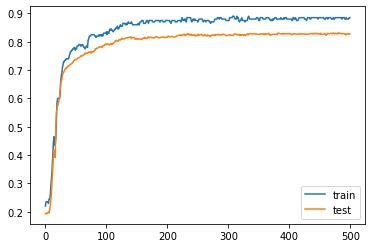

In [53]:
#using matplotlib to plot the accuracy of train and test accuracy to check for overfitting/underfitting
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()